# When /r/games disabled the downvoting button via CSS

Subreddit disabled downvote button on 2013-01-16, thread [here](https://www.reddit.com/r/Games/comments/16oz7t/200000_subscribers_time_to_experiment_with_some/)

## Data processing

Google BigQuery

```
SELECT author, num_comments, score, ups, downs, gilded, created_utc FROM [fh-bigquery:reddit_posts.full_corpus_201509] 
where subreddit = 'Games' 
AND created_utc BETWEEN 1356998400 AND 1359676800
```

In [12]:
!ls

games-analysis.ipynb  reddit_games_comments_notext_201301.csv
readme.md	      reddit_posts_games_201301.csv


In [13]:
!pip install bokeh
import pandas as pd
import seaborn as sns
from bokeh.charts import TimeSeries, output_file, show

%matplotlib inline

In [14]:
posts_df = pd.DataFrame.from_csv("reddit_posts_games_201301.csv")

In [15]:
posts_df[0:5]

,num_comments,score,ups,downs,gilded,created_utc
author,,,,,,
Antipode2,0,0,0,0,0,1359644323
[deleted],160,26,26,0,0,1358042458
[deleted],1,0,0,0,0,1358262178
Placenta_Claus,6,8,8,0,0,1357698707
translucent,356,86,86,0,0,1357999989


In [16]:
posts_df['created'] = pd.to_datetime(posts_df.created_utc, unit='s')
posts_df['created_date'] = posts_df.created.dt.date

In [17]:
posts_df['downs'] = posts_df.score - posts_df.ups

In [18]:
posts_time_ups = posts_df.set_index('created_date').ups.sort_index()
posts_time_ups[0:5]

created_date
2013-01-01     0
2013-01-01    10
2013-01-01     1
2013-01-01    58
2013-01-01     3
Name: ups, dtype: int64

In [19]:
posts_date_df = posts_df.set_index('created').sort_index()

posts_date_df[0:5]

,num_comments,score,ups,downs,gilded,created_utc,created_date
created,,,,,,,
2013-01-01 00:16:34,3,1,1,0,0,1356999394,2013-01-01
2013-01-01 00:26:50,0,0,0,0,0,1357000010,2013-01-01
2013-01-01 01:16:01,3,0,0,0,0,1357002961,2013-01-01
2013-01-01 01:17:08,1,4,4,0,0,1357003028,2013-01-01
2013-01-01 02:06:07,3,0,0,0,0,1357005967,2013-01-01


In [20]:
posts_groupby = posts_date_df.groupby([pd.TimeGrouper('1D', closed='left')])

# Visualizations
## Daily average of number of comments per post

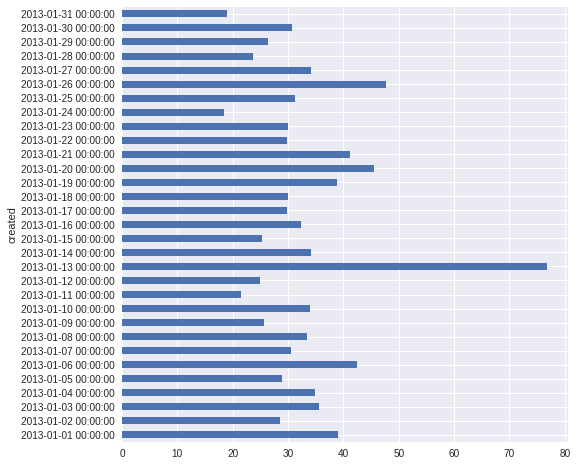

In [21]:
posts_groupby.mean().num_comments.plot(kind='barh', figsize=[8,8])

## Daily average of number of upvotes per post

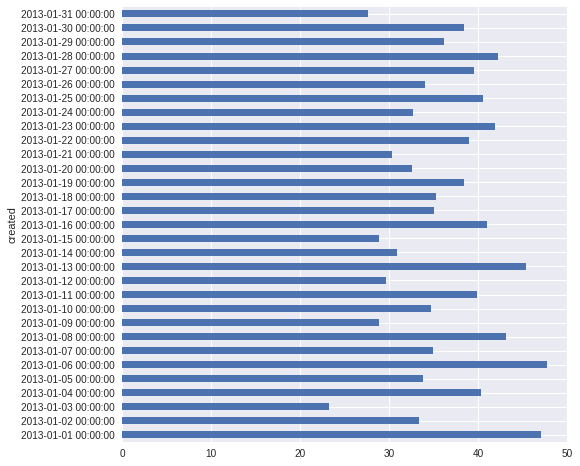

In [22]:
posts_groupby.mean().ups.plot(kind='barh', figsize=[8,8])